In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

data_true = pd.read_csv("dados/True.csv")
data_fake = pd.read_csv("dados/Fake.csv")

In [3]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
data_true['subject'].unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [6]:
data_fake['subject'].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [7]:
data_fake['subject'].value_counts()

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

In [8]:
con_null_text = data_true['text'].isnull().sum()
con_null_title = data_true['title'].isnull().sum()
print('Text:', con_null_text, "Title:", con_null_title)

Text: 0 Title: 0


<Axes: xlabel='subject'>

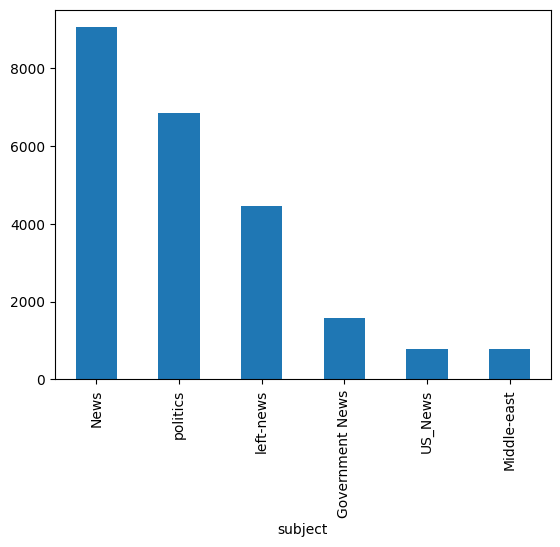

In [9]:
data_fake['subject'].value_counts().plot(kind='bar')

<Axes: xlabel='subject'>

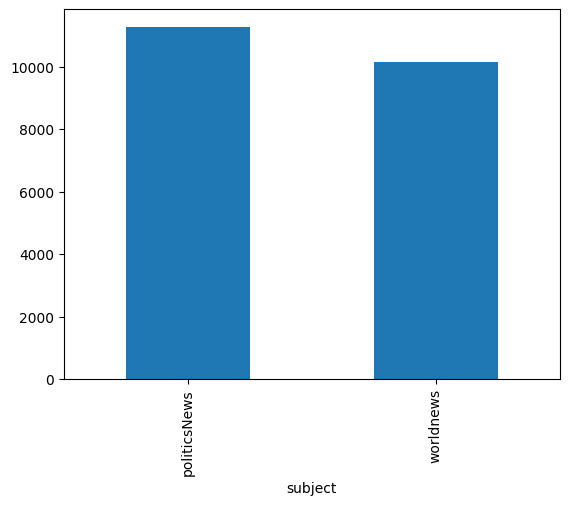

In [10]:
data_true['subject'].value_counts().plot(kind='bar')

In [11]:
data_true.text[2]

'WASHINGTON (Reuters) - The special counsel investigation of links between Russia and President Trump’s 2016 election campaign should continue without interference in 2018, despite calls from some Trump administration allies and Republican lawmakers to shut it down, a prominent Republican senator said on Sunday. Lindsey Graham, who serves on the Senate armed forces and judiciary committees, said Department of Justice Special Counsel Robert Mueller needs to carry on with his Russia investigation without political interference. “This investigation will go forward. It will be an investigation conducted without political influence,” Graham said on CBS’s Face the Nation news program. “And we all need to let Mr. Mueller do his job. I think he’s the right guy at the right time.”  The question of how Russia may have interfered in the election, and how Trump’s campaign may have had links with or co-ordinated any such effort, has loomed over the White House since Trump took office in January. It

## Bag of Words of true news

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(data_true.text)
print(bag_of_words.shape)

(21417, 50)


In [13]:
pip install wordclound

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement wordclound (from versions: none)
ERROR: No matching distribution found for wordclound


In [14]:
%matplotlib inline

from wordcloud import WordCloud

todas_palavras = ' '.join([texto for texto in data_true.text])

nuvem_palavras = WordCloud(width=800, height=500,
                           max_font_size= 110, collocations=False).generate(todas_palavras)

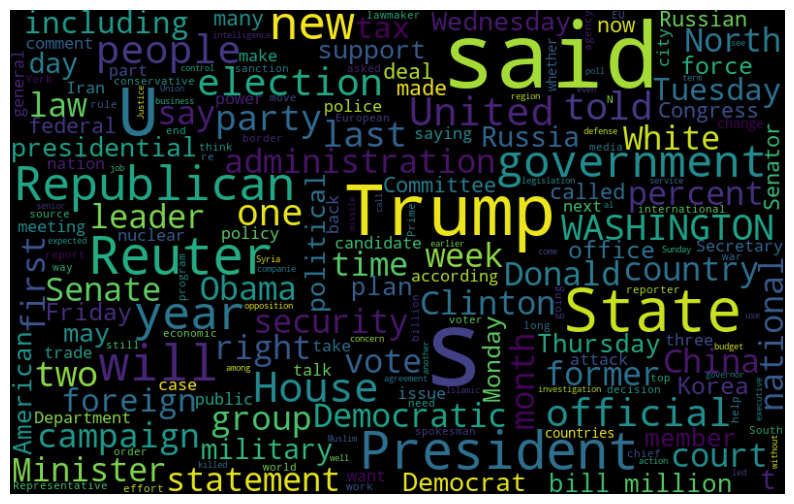

In [15]:
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis("off")
plt.show()

### Processando dos textos

In [16]:
import nltk
from nltk import tokenize

token_espaco = tokenize.WhitespaceTokenizer()
token_texto = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_texto)

In [17]:
df_frequencia = pd.DataFrame({'Palavras':frequencia.keys(), 'Frequência':frequencia.values()})

In [18]:
df_frequencia.nlargest(columns='Frequência', n=10)

,Palavras,Frequência
11,the,422622
23,to,243787
5,of,204339
6,a,187214
33,and,179411
10,in,169538
31,on,104807
115,that,82512
18,for,77867
148,said,72025


In [19]:
token_pontuacao = tokenize.WordPunctTokenizer()

In [20]:
from string import punctuation
from nltk.corpus import stopwords

In [21]:
palavras_irrelevantes = stopwords.words('english')

pontuacao = list()

for ponto in punctuation:
    pontuacao.append(ponto)

pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = list()
for news in data_true.text:
    nova_frase = list()
    news = news.lower()
    palavras_texto = token_pontuacao.tokenize(news)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
                            
data_true["text_processado_T"] = frase_processada

In [22]:
import unidecode

stopwords_sem_acentos = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]
stopwords_sem_acentos

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from

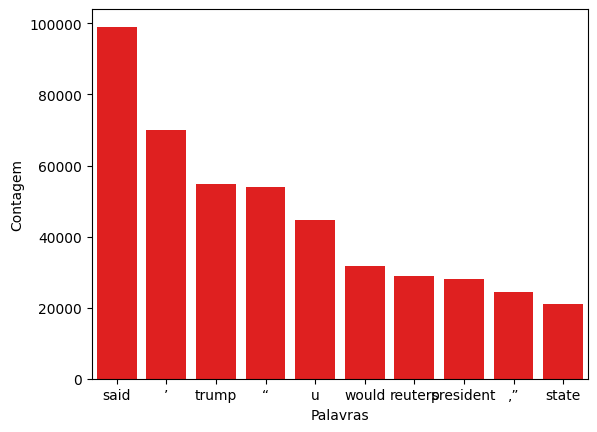

In [23]:
import seaborn as sns 

def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavras":frequencia.keys(), 
                                  "Frequência":frequencia.values()})
    
    df_frequencia_ = df_frequencia.nlargest(columns="Frequência", n= quantidade)
    
    ax = sns.barplot(data=df_frequencia_, x="Palavras", y="Frequência", color='red')
    ax.set(ylabel= 'Contagem')
    
    
pareto(data_true, "text_processado_T", 10)

In [24]:
frase_processada = list()
for news in data_true.text:
    nova_frase = list()
    news = news.lower()
    palavras_texto = token_pontuacao.tokenize(news)
    for palavras in palavras_texto:
        if palavras not in stopwords_sem_acentos:
            nova_frase.append(palavras)
    frase_processada.append(' '.join(nova_frase))

data_true["text_processado_2_T"] = frase_processada

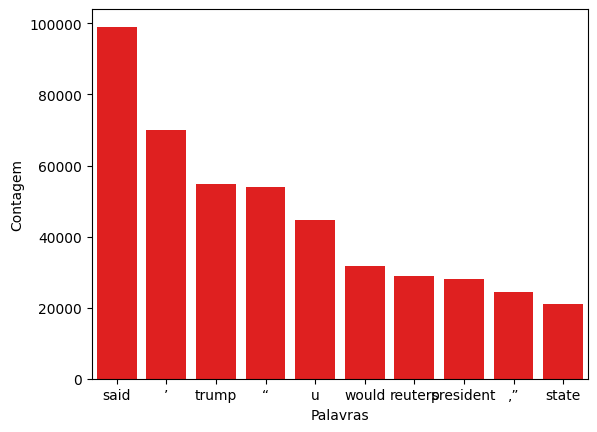

In [25]:
pareto(data_true, "text_processado_2_T", 10)

In [26]:
def nuvem_de_palavras(texto, coluna_texto):
    todas_palavras = ' '.join([texto for texto in coluna_texto])

    nuvem_palavras = WordCloud(width=800, height=500,
                               max_font_size= 110, collocations=False).generate(todas_palavras)
    
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.title("True News")
    plt.axis("off")
    plt.show()

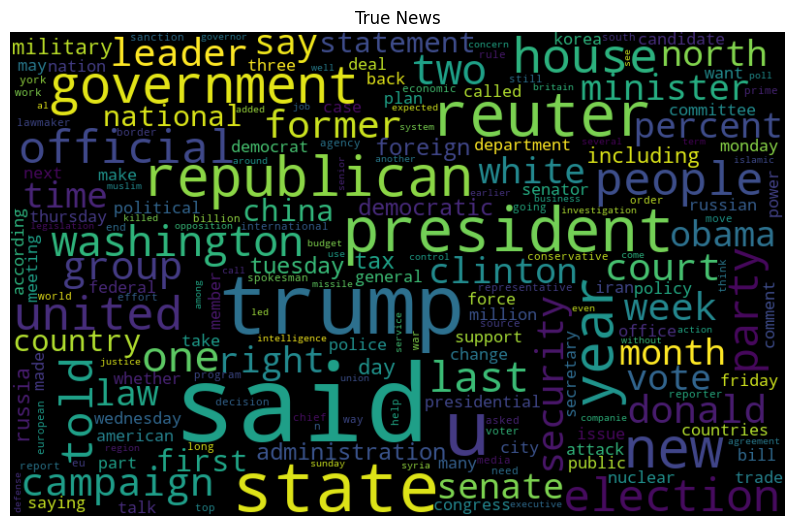

In [27]:
nuvem_de_palavras(data_true, data_true["text_processado_2_T"])

## Bag of Words of Fake News

In [28]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(data_fake.text)
print(bag_of_words.shape)

(23481, 50)


In [29]:
todas_palavras_nfake = ' '.join([texto for texto in (data_fake.text)])

nuvem_palavras_nfake = WordCloud(width=800, height=500,
                           max_font_size= 110, collocations=False).generate(todas_palavras_nfake)

In [30]:
token_espaco = tokenize.WhitespaceTokenizer()
token_texto = token_espaco.tokenize(todas_palavras_nfake)
frequencia_ = nltk.FreqDist(token_texto)

In [31]:
df_frequencia = pd.DataFrame({'Palavras':frequencia_.keys(), 'Frequência':frequencia_.values()})

In [32]:
df_frequencia.nlargest(columns='Frequência', n=10)

,Palavras,Frequência
27,the,483203
20,to,286028
51,of,233193
12,and,213059
8,a,202870
162,in,152840
147,that,138416
79,s,127621
194,is,105555
71,for,88389


In [33]:
frase_processada = list()
for news in data_fake.text:
    nova_frase = list()
    news = news.lower()
    palavras_texto = token_pontuacao.tokenize(news)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
                            
data_fake["text_processado_F"] = frase_processada

In [34]:
frase_processada = list()
for news in data_fake.text:
    nova_frase = list()
    news = news.lower()
    palavras_texto = token_pontuacao.tokenize(news)
    for palavras in palavras_texto:
        if palavras not in stopwords_sem_acentos:
            nova_frase.append(palavras)
    frase_processada.append(' '.join(nova_frase))

data_fake["text_processado_2_F"] = frase_processada

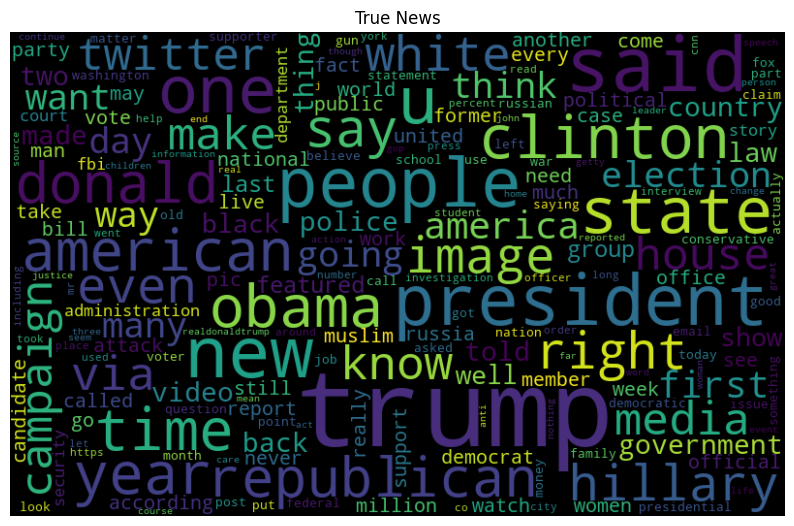

In [35]:
nuvem_de_palavras(data_fake, data_fake["text_processado_2_F"])

In [36]:
data_true.head()

,title,text,subject,date,text_processado_T,text_processado_2_T
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",washington reuters head conservative republica...,washington reuters head conservative republica...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",washington reuters transgender people allowed ...,washington reuters transgender people allowed ...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",washington reuters special counsel investigati...,washington reuters special counsel investigati...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",washington reuters trump campaign adviser geor...,washington reuters trump campaign adviser geor...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",seattle washington reuters president donald tr...,seattle washington reuters president donald tr...


In [37]:
data_fake.head()

,title,text,subject,date,text_processado_F,text_processado_2_F
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",donald trump wish americans happy new year lea...,donald trump wish americans happy new year lea...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",house intelligence committee chairman devin nu...,house intelligence committee chairman devin nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",friday revealed former milwaukee sheriff david...,friday revealed former milwaukee sheriff david...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",christmas day donald trump announced would bac...,christmas day donald trump announced would bac...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",pope francis used annual christmas day message...,pope francis used annual christmas day message...


In [38]:
data_fake.title[1]

' Drunk Bragging Trump Staffer Started Russian Collusion Investigation'

## Bag of Words Title True

In [39]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(data_true.title)
print(bag_of_words.shape)

(21417, 50)


In [40]:
todas_palavras_ttrue = ' '.join([texto for texto in (data_true.title)])

nuvem_palavras_ttrue = WordCloud(width=800, height=500,
                           max_font_size= 110, collocations=False).generate(todas_palavras_ttrue)

In [41]:
token_espaco = tokenize.WhitespaceTokenizer()
token_texto = token_espaco.tokenize(todas_palavras_ttrue)
frequencia_t = nltk.FreqDist(token_texto)

In [42]:
df_frequencia = pd.DataFrame({'Palavras':frequencia_t.keys(), 'Frequência':frequencia_t.values()})

In [43]:
df_frequencia.nlargest(columns='Frequência', n=10)

,Palavras,Frequência
11,to,7794
162,in,4433
36,Trump,4400
1,U.S.,3872
15,on,3315
90,of,3008
53,says,2969
43,for,2745
169,with,1469
216,House,1360


In [44]:
frase_processada = list()
for title_news in data_true.title:
    nova_frase = list()
    title_news = title_news.lower()
    palavras_title = token_pontuacao.tokenize(title_news)
    for palavra in palavras_title:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
                            
data_true["title_processado_T"] = frase_processada

In [45]:
frase_processada = list()
for title_news in data_true.title:
    nova_frase = list()
    title_news = title_news.lower()
    palavras_title = token_pontuacao.tokenize(title_news)
    for palavras in palavras_title:
        if palavras not in stopwords_sem_acentos:
            nova_frase.append(palavras)
    frase_processada.append(' '.join(nova_frase))

data_true["title_processado_2_T"] = frase_processada

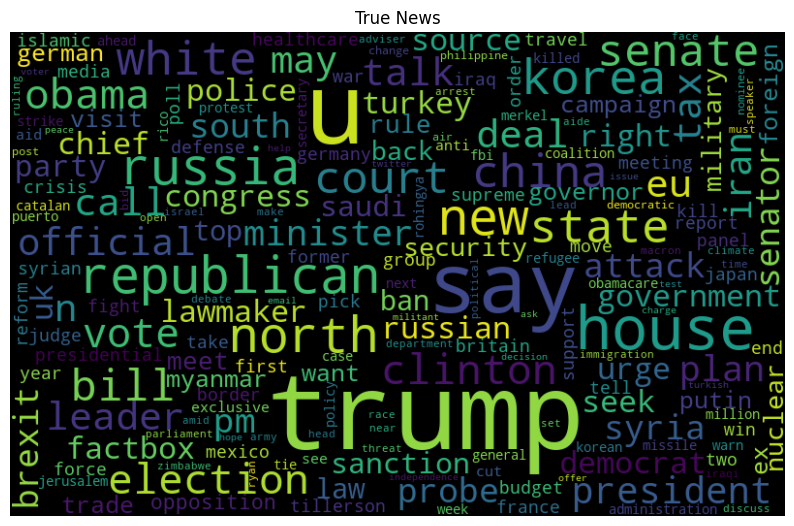

In [46]:
nuvem_de_palavras(data_true, data_true["title_processado_2_T"])

## Bag of Words Title Fake

In [47]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(data_fake.title)
print(bag_of_words.shape)

(23481, 50)


In [48]:
todas_palavras_tfake = ' '.join([texto for texto in (data_true.title)])

nuvem_palavras_tfake = WordCloud(width=800, height=500,
                           max_font_size= 110, collocations=False).generate(todas_palavras_tfake)

In [49]:
token_espaco = tokenize.WhitespaceTokenizer()
token_texto = token_espaco.tokenize(todas_palavras_tfake)
frequencia_tf = nltk.FreqDist(token_texto)

In [50]:
df_frequencia = pd.DataFrame({'Palavras':frequencia_tf.keys(), 'Frequência':frequencia_tf.values()})

In [51]:
df_frequencia.nlargest(columns='Frequência', n=10)

,Palavras,Frequência
11,to,7794
162,in,4433
36,Trump,4400
1,U.S.,3872
15,on,3315
90,of,3008
53,says,2969
43,for,2745
169,with,1469
216,House,1360


In [52]:
frase_processada = list()
for title_news in data_fake.title:
    nova_frase = list()
    title_news = title_news.lower()
    palavras_title = token_pontuacao.tokenize(title_news)
    for palavra in palavras_title:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
                            
data_fake["title_processado_F"] = frase_processada

In [53]:
frase_processada = list()
for title_news in data_fake.title:
    nova_frase = list()
    title_news = title_news.lower()
    palavras_title = token_pontuacao.tokenize(title_news)
    for palavras in palavras_title:
        if palavras not in stopwords_sem_acentos:
            nova_frase.append(palavras)
    frase_processada.append(' '.join(nova_frase))

data_fake["title_processado_2_F"] = frase_processada

In [54]:
data_fake.head(3)

,title,text,subject,date,text_processado_F,text_processado_2_F,title_processado_F,title_processado_2_F
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",donald trump wish americans happy new year lea...,donald trump wish americans happy new year lea...,donald trump sends embarrassing new year ’ eve...,donald trump sends embarrassing new year ’ eve...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",house intelligence committee chairman devin nu...,house intelligence committee chairman devin nu...,drunk bragging trump staffer started russian c...,drunk bragging trump staffer started russian c...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",friday revealed former milwaukee sheriff david...,friday revealed former milwaukee sheriff david...,sheriff david clarke becomes internet joke thr...,sheriff david clarke becomes internet joke thr...


In [55]:
data_true.head(3)

,title,text,subject,date,text_processado_T,text_processado_2_T,title_processado_T,title_processado_2_T
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",washington reuters head conservative republica...,washington reuters head conservative republica...,u budget fight looms republicans flip fiscal s...,u budget fight looms republicans flip fiscal s...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",washington reuters transgender people allowed ...,washington reuters transgender people allowed ...,u military accept transgender recruits monday ...,u military accept transgender recruits monday ...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",washington reuters special counsel investigati...,washington reuters special counsel investigati...,senior u republican senator let mr mueller job,senior u republican senator let mr mueller job


## Montando DataSet de classsificação (Title)

In [56]:
data_true['lable_true'] = 0
data_fake['lable_fake'] = 1

In [57]:
data_true_processed = data_true[['title_processado_2_T', 'lable_true']]
data_fake_processed = data_fake[['title_processado_2_F', 'lable_fake']]

In [58]:
df = pd.concat([data_true_processed, data_fake_processed], ignore_index=True)

In [59]:
data = df.sample(frac=1, random_state=45).reset_index(drop=True)

In [60]:
data.head(5)

,title_processado_2_T,lable_true,title_processado_2_F,lable_fake
0,NaN,NaN,anonymous video bill clinton raping 13 yr old ...,1.0
1,trump ask former fbi director comey pledge loy...,0.0,NaN,NaN
2,evidence russian interference british votes uk...,0.0,NaN,NaN
3,NaN,NaN,rich couple ’ insane explanation ’ vote trump ...,1.0
4,four republican senators say cannot support he...,0.0,NaN,NaN


In [61]:
data['title_processado'] = data['title_processado_2_T'].fillna(data['title_processado_2_F'])

data['label_T_F'] = data['lable_true'].fillna(data['lable_fake'])

data['label_T_F'] = data['label_T_F'].astype(int)

In [62]:
data.drop(['title_processado_2_T', 'title_processado_2_F', 'lable_true', 'lable_fake'], axis=1, inplace=True)

In [63]:
data.head(10)

,title_processado,label_T_F
0,anonymous video bill clinton raping 13 yr old ...,1
1,trump ask former fbi director comey pledge loy...,0
2,evidence russian interference british votes uk...,0
3,rich couple ’ insane explanation ’ vote trump ...,1
4,four republican senators say cannot support he...,0
5,india says committed climate pact despite u wi...,0
6,germany calls restraint dialogue zimbabwe,0
7,trump made nasty comment nancy reagan ’ looks ...,1
8,despite apology indonesia asks u blocked milit...,0
9,brutal truth mooching bum wanted next presiden...,1


In [64]:
#data.to_csv("data_tratado_t_f", index=False)

In [65]:
data_fake.head(3)

,title,text,subject,date,text_processado_F,text_processado_2_F,title_processado_F,title_processado_2_F,lable_fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",donald trump wish americans happy new year lea...,donald trump wish americans happy new year lea...,donald trump sends embarrassing new year ’ eve...,donald trump sends embarrassing new year ’ eve...,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",house intelligence committee chairman devin nu...,house intelligence committee chairman devin nu...,drunk bragging trump staffer started russian c...,drunk bragging trump staffer started russian c...,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",friday revealed former milwaukee sheriff david...,friday revealed former milwaukee sheriff david...,sheriff david clarke becomes internet joke thr...,sheriff david clarke becomes internet joke thr...,1


In [66]:
data_true.head(3)

,title,text,subject,date,text_processado_T,text_processado_2_T,title_processado_T,title_processado_2_T,lable_true
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",washington reuters head conservative republica...,washington reuters head conservative republica...,u budget fight looms republicans flip fiscal s...,u budget fight looms republicans flip fiscal s...,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",washington reuters transgender people allowed ...,washington reuters transgender people allowed ...,u military accept transgender recruits monday ...,u military accept transgender recruits monday ...,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",washington reuters special counsel investigati...,washington reuters special counsel investigati...,senior u republican senator let mr mueller job,senior u republican senator let mr mueller job,0


## Montando DataSet de classsificação (Texto)

In [71]:
data_true_processed_tx = data_true[['text_processado_2_T', 'lable_true']]
data_fake_processed_tx = data_fake[['text_processado_2_F', 'lable_fake']]

In [72]:
df_tx = pd.concat([data_true_processed_tx, data_fake_processed_tx], ignore_index=True)

data_tx = df_tx.sample(frac=1, random_state=45).reset_index(drop=True)

In [73]:
data_tx.head(3)

,text_processado_2_T,lable_true,text_processado_2_F,lable_fake
0,NaN,NaN,anonymous loosely associated international net...,1.0
1,washington reuters u president donald trump as...,0.0,NaN,NaN
2,london reuters british foreign minister boris ...,0.0,NaN,NaN


In [74]:
data_tx['text_processado'] = data_tx['text_processado_2_T'].fillna(data_tx['text_processado_2_F'])

data_tx['label_T_F'] = data_tx['lable_true'].fillna(data_tx['lable_fake'])

data_tx['label_T_F'] = data_tx['label_T_F'].astype(int)

In [75]:
data_tx.drop(['text_processado_2_T', 'text_processado_2_F', 'lable_true', 'lable_fake'], axis=1, inplace=True)

In [76]:
data_tx

,text_processado,label_T_F
0,anonymous loosely associated international net...,1
1,washington reuters u president donald trump as...,0
2,london reuters british foreign minister boris ...,0
3,know donald trump appeals calls poorly educate...,1
4,washington reuters four conservative u republi...,0
...,...,...
44893,group called people action held big gathering ...,1
44894,moscow reuters twitter ban adverts russian med...,0
44895,baghdad reuters prominent iraqi militia backed...,0
44896,mexico city reuters mexican economy minister i...,0


In [81]:
data_tx.text_processado[0]

'anonymous loosely associated international network activists hacktivists made video threatening plunge election chaos sexual abuse enabler crooked hillary claim sex tape showing bill clinton raping 13 year old girl releasing alleged rape filmed billionaire buddy convicted pedophile jeffrey epstein pedophile island anonymous claims hillary knew hiding'

In [82]:
#data_tx.to_csv("datatx_tratado_t_f", index=False)

In [84]:
data_tx.text_processado.isnull().sum()

0